In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from unityagents import UnityEnvironment
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe", no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]

In [4]:
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

In [5]:
score = 0

In [6]:
from dqn_agent import Agent
agent = Agent(state_size=37, action_size=4, seed=0)

In [7]:
def dqn(n_episodes=400, max_t=300, eps_start=1.0, eps_end=0.05, eps_decay=0.99):

    scores = []
    scores_window = deque(maxlen=100)
    actions_window = deque(maxlen=50)
    steps_window = deque(maxlen=50)
    eps = eps_start
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        
        for t in range(max_t):
            action = int(agent.act(state, eps))
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            actions_window.append(action)
            
            if done:
                break 
                
        scores_window.append(score)
        scores.append(score)
        
        steps_window.append(t)
                
        eps = max(eps_end, eps_decay*eps)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
            
    return (scores, actions_window, steps_window)

In [8]:
scores, actions, steps = dqn()

Episode 100	Average Score: 1.49
Episode 200	Average Score: 7.84
Episode 300	Average Score: 11.57
Episode 380	Average Score: 13.01
Environment solved in 380 episodes!	Average Score: 13.01


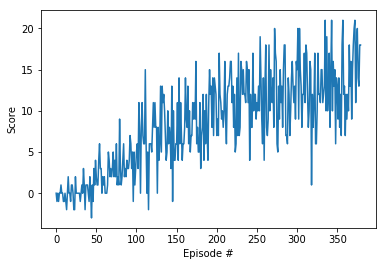

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

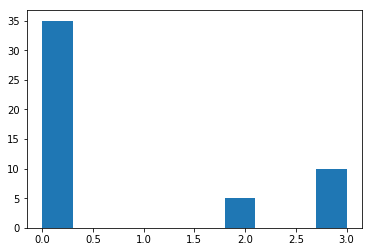

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(actions)

plt.show()

In [11]:
env.close()